In [66]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

In [67]:
foot_traffic = pd.read_csv("foot_traffic.csv")
foot_traffic

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695
...,...
995,706.009031
996,705.610549
997,704.771335
998,703.559920


<AxesSubplot:>

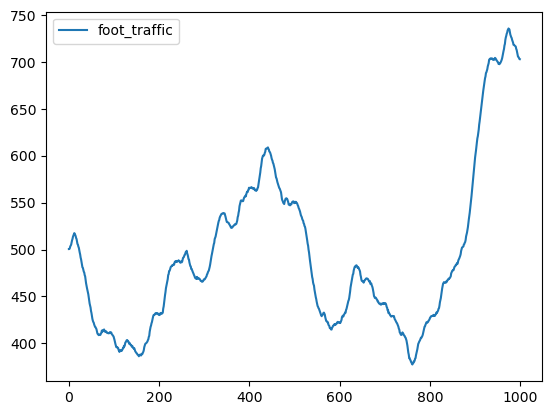

In [68]:
foot_traffic.plot()

In [69]:
foot_train = foot_traffic.iloc[:900, :]
foot_test = foot_traffic.iloc[900:, :]

## Check Stationarity

In [70]:
adfuller(foot_train) #p-value ถ้าต่ำกว่า 0.5 เป็น Stationarity แล้ว

(-1.5231506087528535,
 0.522029568974913,
 5,
 894,
 {'1%': -3.4376857669714957,
  '5%': -2.864778351359889,
  '10%': -2.5684943199755765},
 2464.0182898796647)

In [71]:
foot_train_diff = foot_train.diff().dropna()
foot_train_diff

,foot_traffic
1,0.025651
2,0.904511
3,1.869114
4,0.836705
5,1.039848
...,...
895,5.600569
896,5.014780
897,5.016708
898,5.761452


In [72]:
adfuller(foot_train_diff) #d=1 <- diff แล้ว

(-4.614764424532172,
 0.00012131323032767235,
 4,
 894,
 {'1%': -3.4376857669714957,
  '5%': -2.864778351359889,
  '10%': -2.5684943199755765},
 2462.2684187474106)

## Check MA 

<AxesSubplot:>

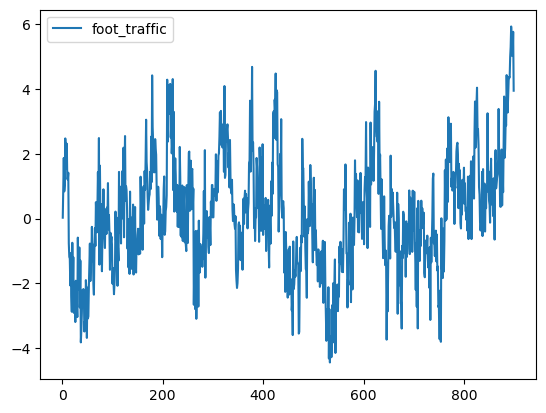

In [73]:
foot_train_diff.plot()

## Check AR

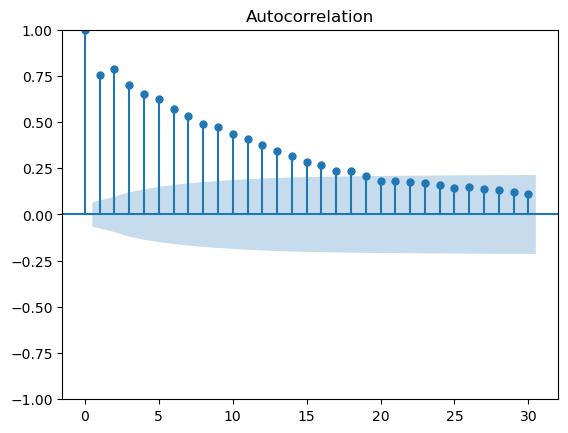

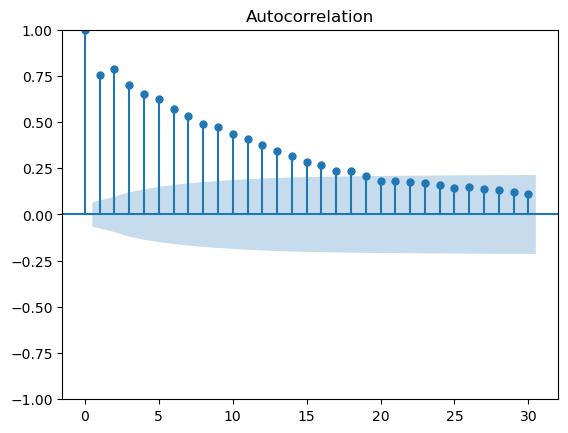

In [81]:
plot_acf(foot_train_diff)

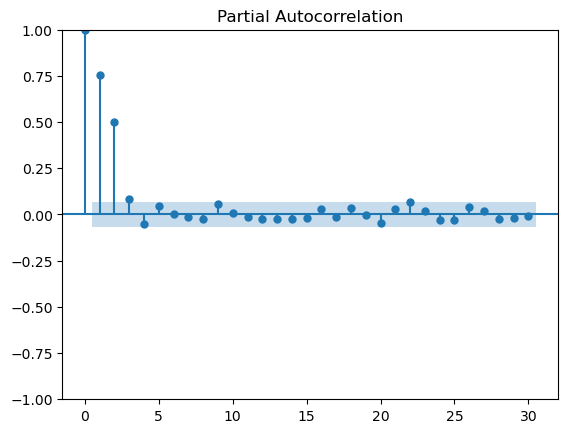

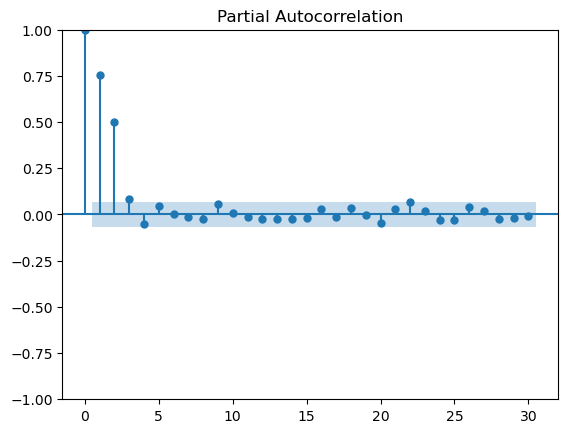

In [74]:
plot_pacf(foot_train_diff) #p = 3

## fit AR(3) <- p=3, d=1

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
ar_model = SARIMAX(foot_train, order=(3,1,0))
fitted_ar = ar_model.fit()

In [77]:
fitted_ar.forecast(steps=100)

900    598.150358
901    602.069569
902    605.891484
903    609.448796
904    612.813405
          ...    
995    667.295850
996    667.309801
997    667.322945
998    667.335328
999    667.346995
Name: predicted_mean, Length: 100, dtype: float64

In [78]:
foot_test[:100]

,foot_traffic
900,598.523173
901,602.122662
902,606.066299
903,610.789036
904,614.762421
...,...
995,706.009031
996,705.610549
997,704.771335
998,703.559920


In [79]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [80]:
mape(foot_test[:100], fitted_ar.forecast(steps=100)) #ยิง predict ยาว error ยิ่งเยอะขึ้น

0.05476027246422611